In [89]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt


In [90]:
url = 'https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue'

In [91]:
response    = requests.get(url)

html_content = response.content

In [92]:
soup = BeautifulSoup(html_content , 'html.parser')

soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-0 vector-feature-client-preferences-disabled vector-feature-client-prefs-pinned-disabled vector-toc-available" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>List of largest companies in the United States by revenue - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-wi

In [93]:
table = soup.find('table' , class_ = "wikitable")

table

<table class="wikitable sortable">
<caption>
</caption>
<tbody><tr>
<th>Rank
</th>
<th>Name
</th>
<th>Industry
</th>
<th>Revenue <br/>(USD millions)
</th>
<th>Revenue growth
</th>
<th>Employees
</th>
<th>Headquarters
</th></tr>
<tr>
<td>1
</td>
<td><a href="/wiki/Walmart" title="Walmart">Walmart</a>
</td>
<td><a href="/wiki/Retail" title="Retail">Retail</a>
</td>
<td style="text-align:center;">611,289
</td>
<td style="text-align:center;"><span typeof="mw:File"><span title="Increase"><img alt="Increase" class="mw-file-element" data-file-height="300" data-file-width="300" decoding="async" height="11" src="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/11px-Increase2.svg.png" srcset="//upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/17px-Increase2.svg.png 1.5x, //upload.wikimedia.org/wikipedia/commons/thumb/b/b0/Increase2.svg/22px-Increase2.svg.png 2x" width="11"/></span></span> <span data-sort-value="7000300000000000000♠" style="display:none"></span> 6.

In [94]:
# extracting the content of the table

rows = table.find_all('tr')  

headings = [th.text.strip() for th in rows[0].find_all('th')]  

data = [[td.text.strip() for td in row.find_all('td')] for row in rows[1:]] 

In [95]:
# creating a pandas dataframe to store the content of the table

data_df = pd.DataFrame(data , columns = headings)

data_df.head(5)

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [96]:
# summary of the data

data_df.describe()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
count,100,100,100,100,100,100,100
unique,100,100,38,99,92,97,76
top,1,Walmart,Financials,"47,194",9.4%,"50,000","New York City, New York"
freq,1,1,11,2,2,2,12


In [97]:
# hmmmm it seems like we need to convert some columns into numerical data to visualize it

data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Rank                    100 non-null    object
 1   Name                    100 non-null    object
 2   Industry                100 non-null    object
 3   Revenue (USD millions)  100 non-null    object
 4   Revenue growth          100 non-null    object
 5   Employees               100 non-null    object
 6   Headquarters            100 non-null    object
dtypes: object(7)
memory usage: 5.6+ KB


In [98]:
columns_toConvert = ["Revenue (USD millions)",'Revenue growth','Employees']


data_df["Revenue (USD millions)"] = data_df["Revenue (USD millions)"].str.replace(',','')

data_df["Revenue growth"] = data_df["Revenue growth"].str.replace('%','')

data_df["Employees"] = data_df["Employees"].str.replace(',','')


In [99]:
# converting the columns to numerical values

for column in columns_toConvert:
    
    data_df[column] = pd.to_numeric(data_df[column])


In [100]:
data_df.dtypes

Rank                       object
Name                       object
Industry                   object
Revenue (USD millions)      int64
Revenue growth            float64
Employees                   int64
Headquarters               object
dtype: object

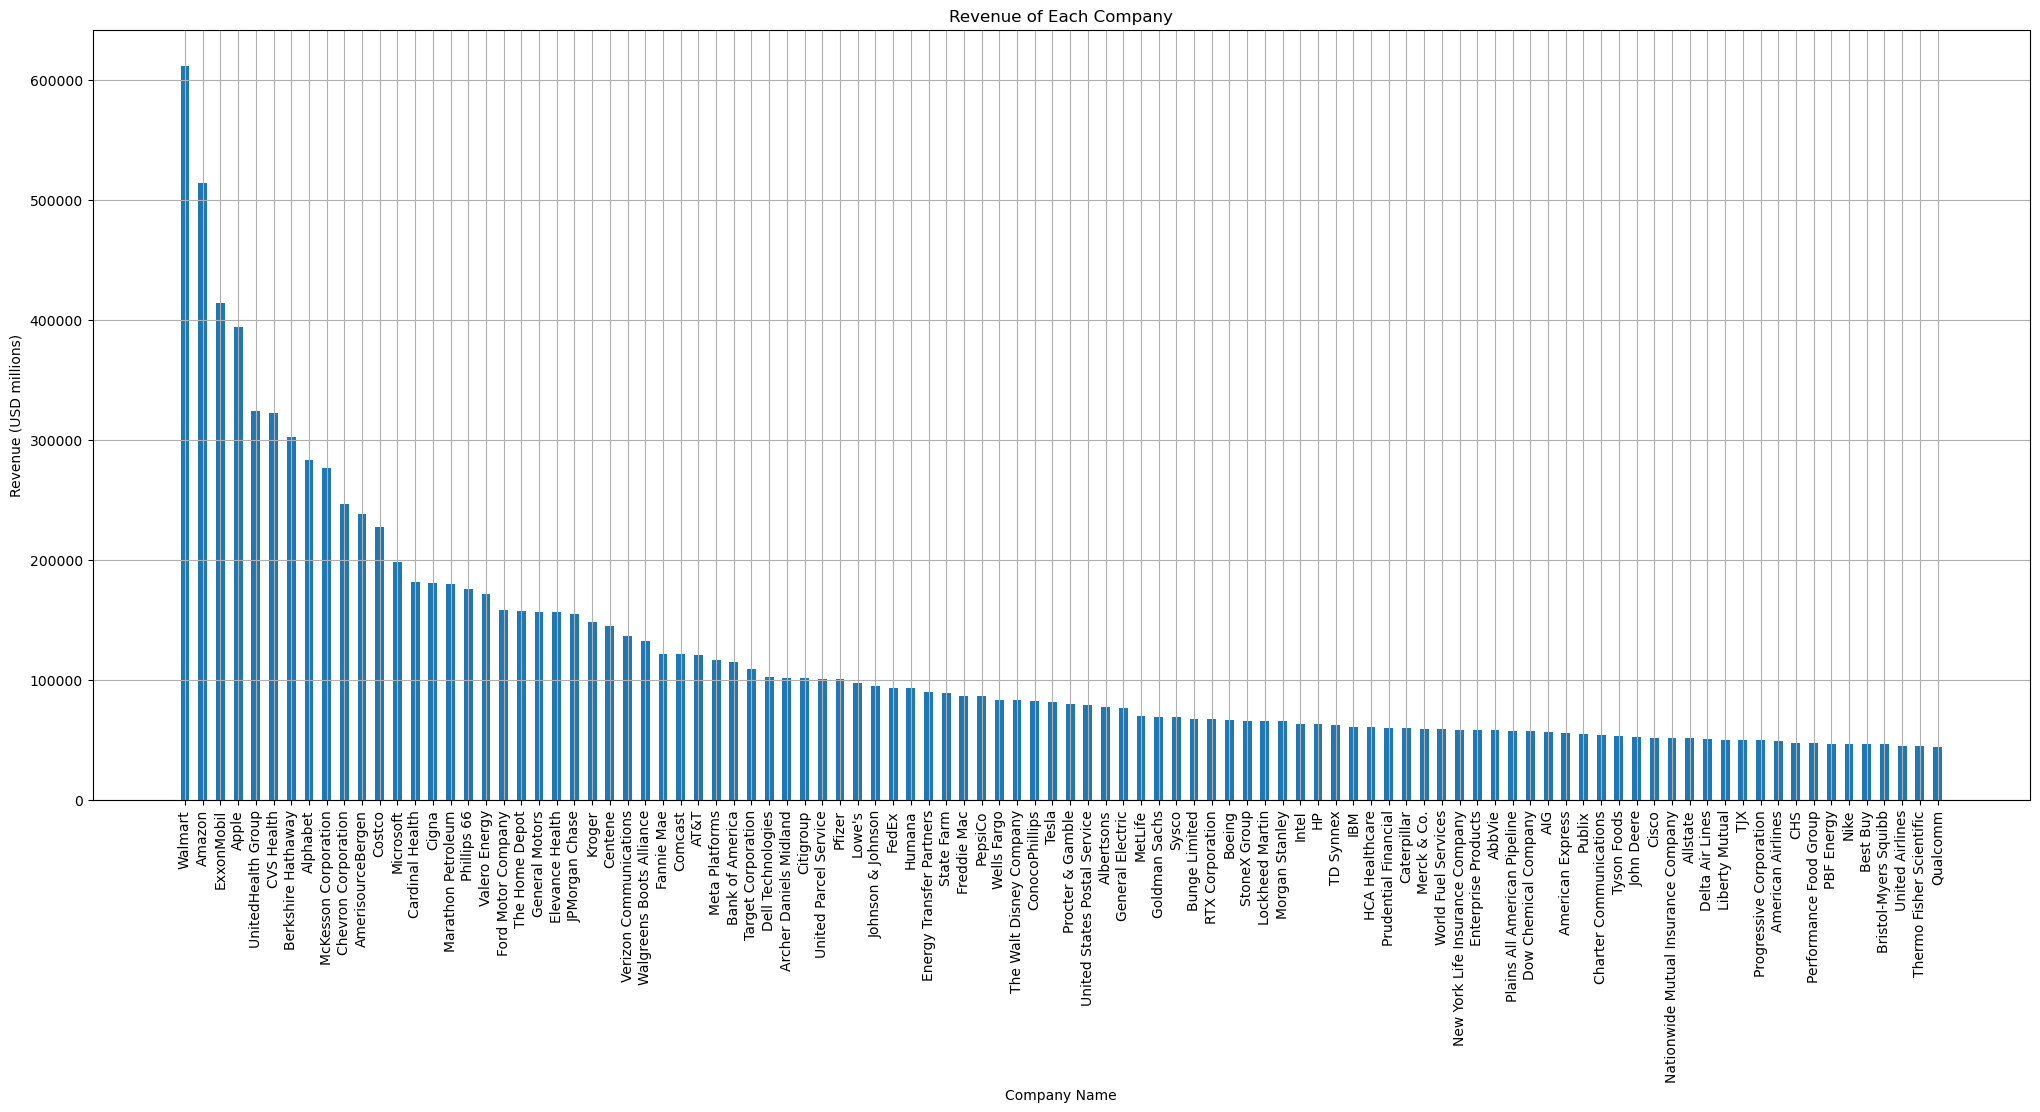

In [101]:
#visualizing the revenue for each company

plt.figure(figsize=(25, 10))  

plt.bar(data_df["Name"], data_df["Revenue (USD millions)"] , width=0.5)
plt.xlabel("Company Name")
plt.ylabel("Revenue (USD millions)")
plt.title("Revenue of Each Company")
plt.xticks(rotation=90)  
plt.grid(True)  
plt.show()


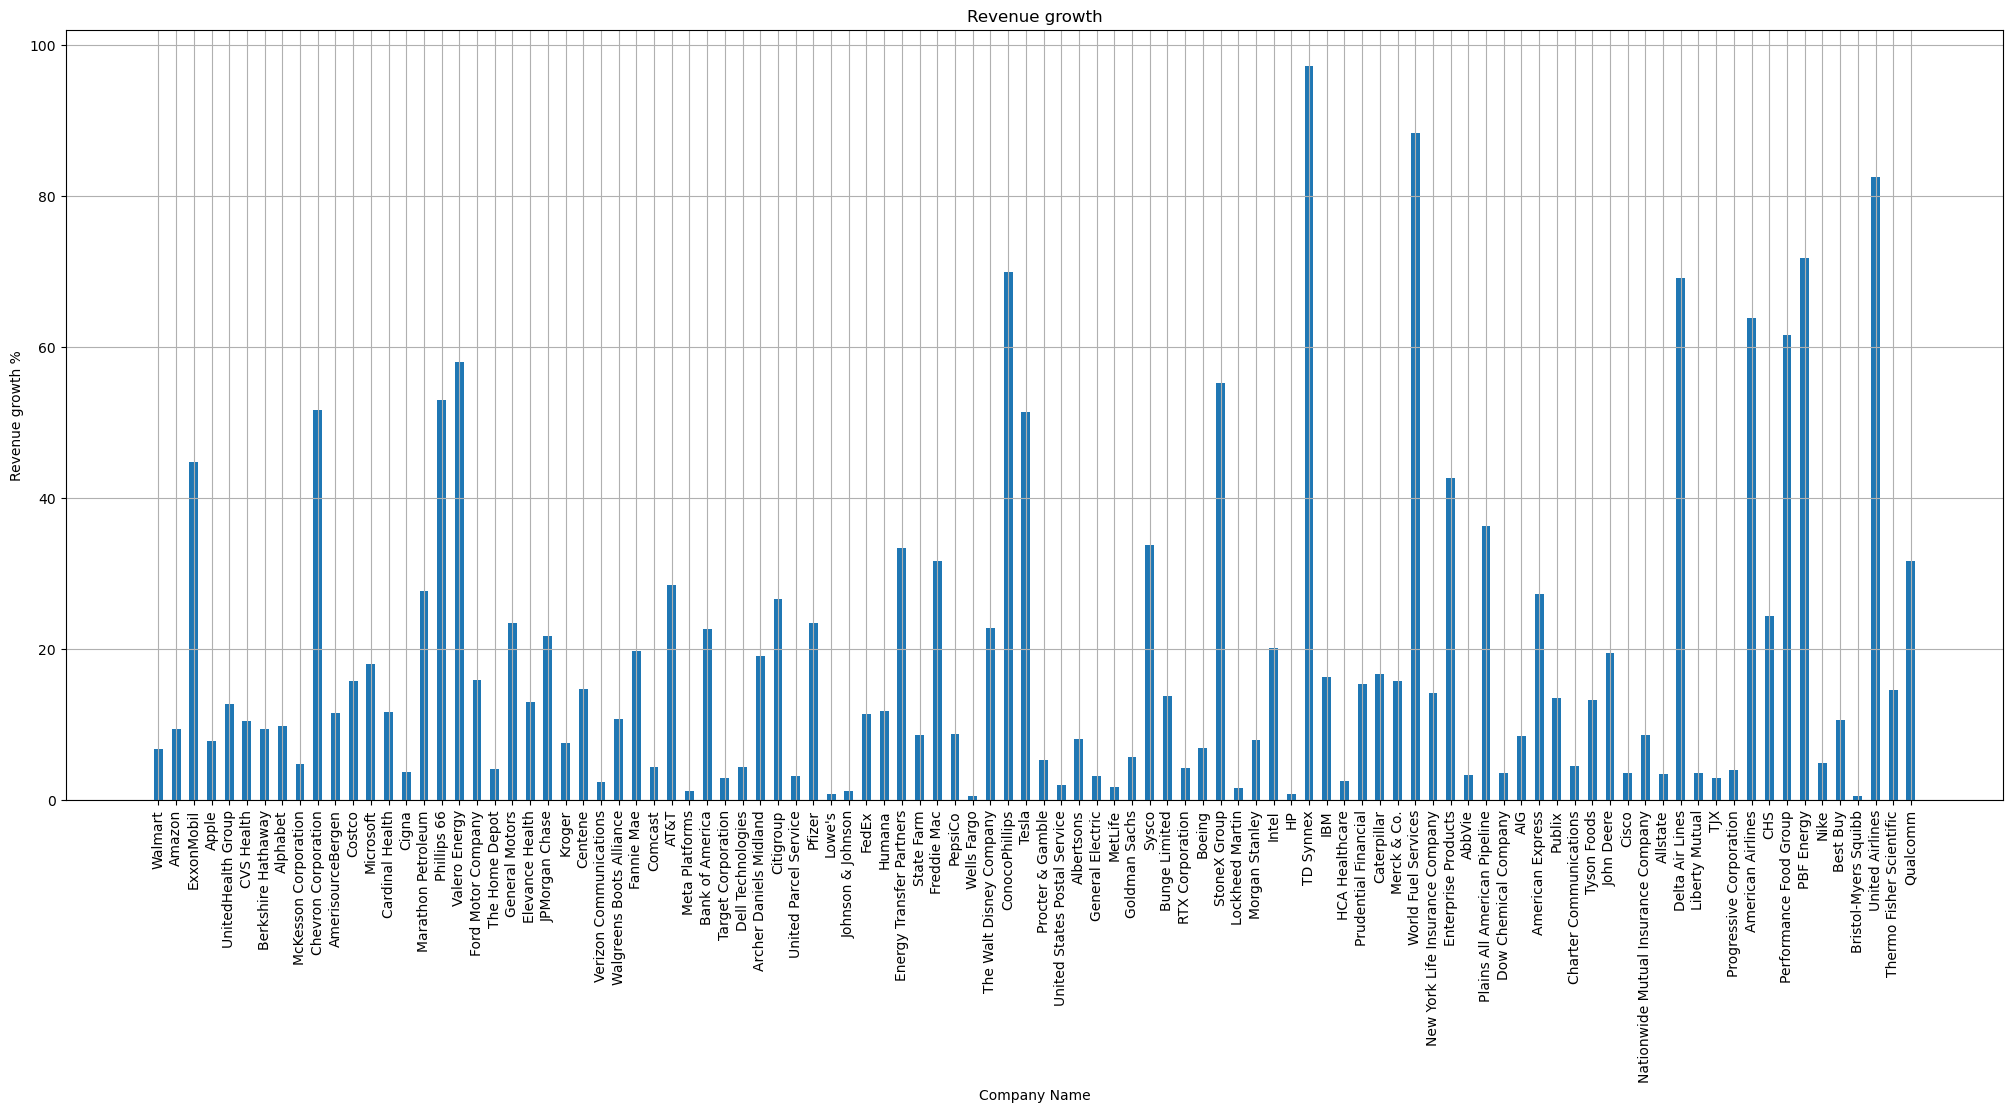

In [102]:
plt.figure(figsize=(25, 10))  

plt.bar(data_df["Name"], data_df["Revenue growth"] , width=0.5)
plt.xlabel("Company Name")
plt.ylabel("Revenue growth %")
plt.title("Revenue growth")
plt.xticks(rotation=90)  
plt.grid(True)  
plt.show()

In [103]:
data_df['Employees'] = data_df['Employees'] /1000

data_df['Employees'].head(5)

0    2100.0
1    1540.0
2      62.0
3     164.0
4     400.0
Name: Employees, dtype: float64

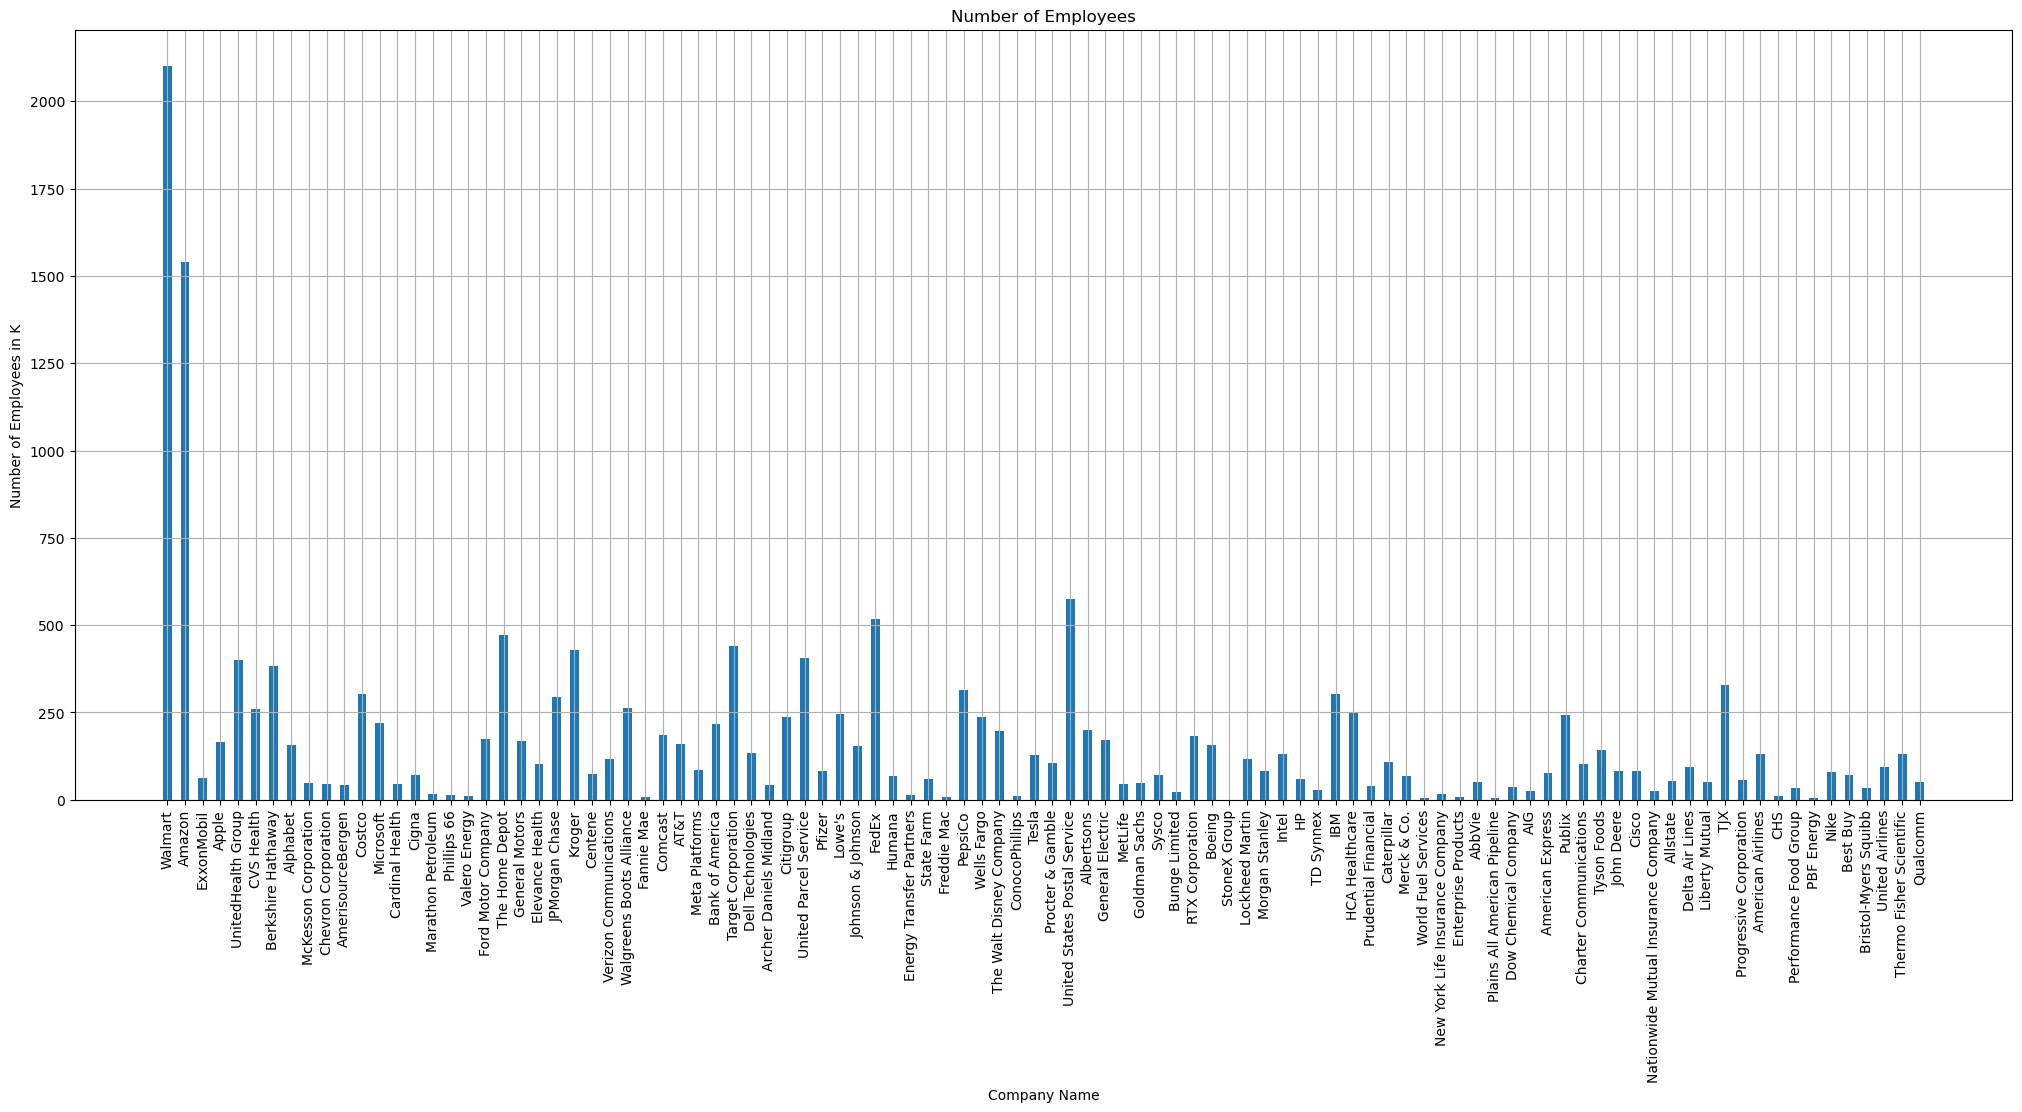

In [104]:
plt.figure(figsize=(25, 10))  

plt.bar(data_df["Name"], data_df["Employees"] , width=0.5)
plt.xlabel("Company Name")
plt.ylabel("Number of Employees in K")
plt.title("Number of Employees")
plt.xticks(rotation=90)  
plt.grid(True)  
plt.show()

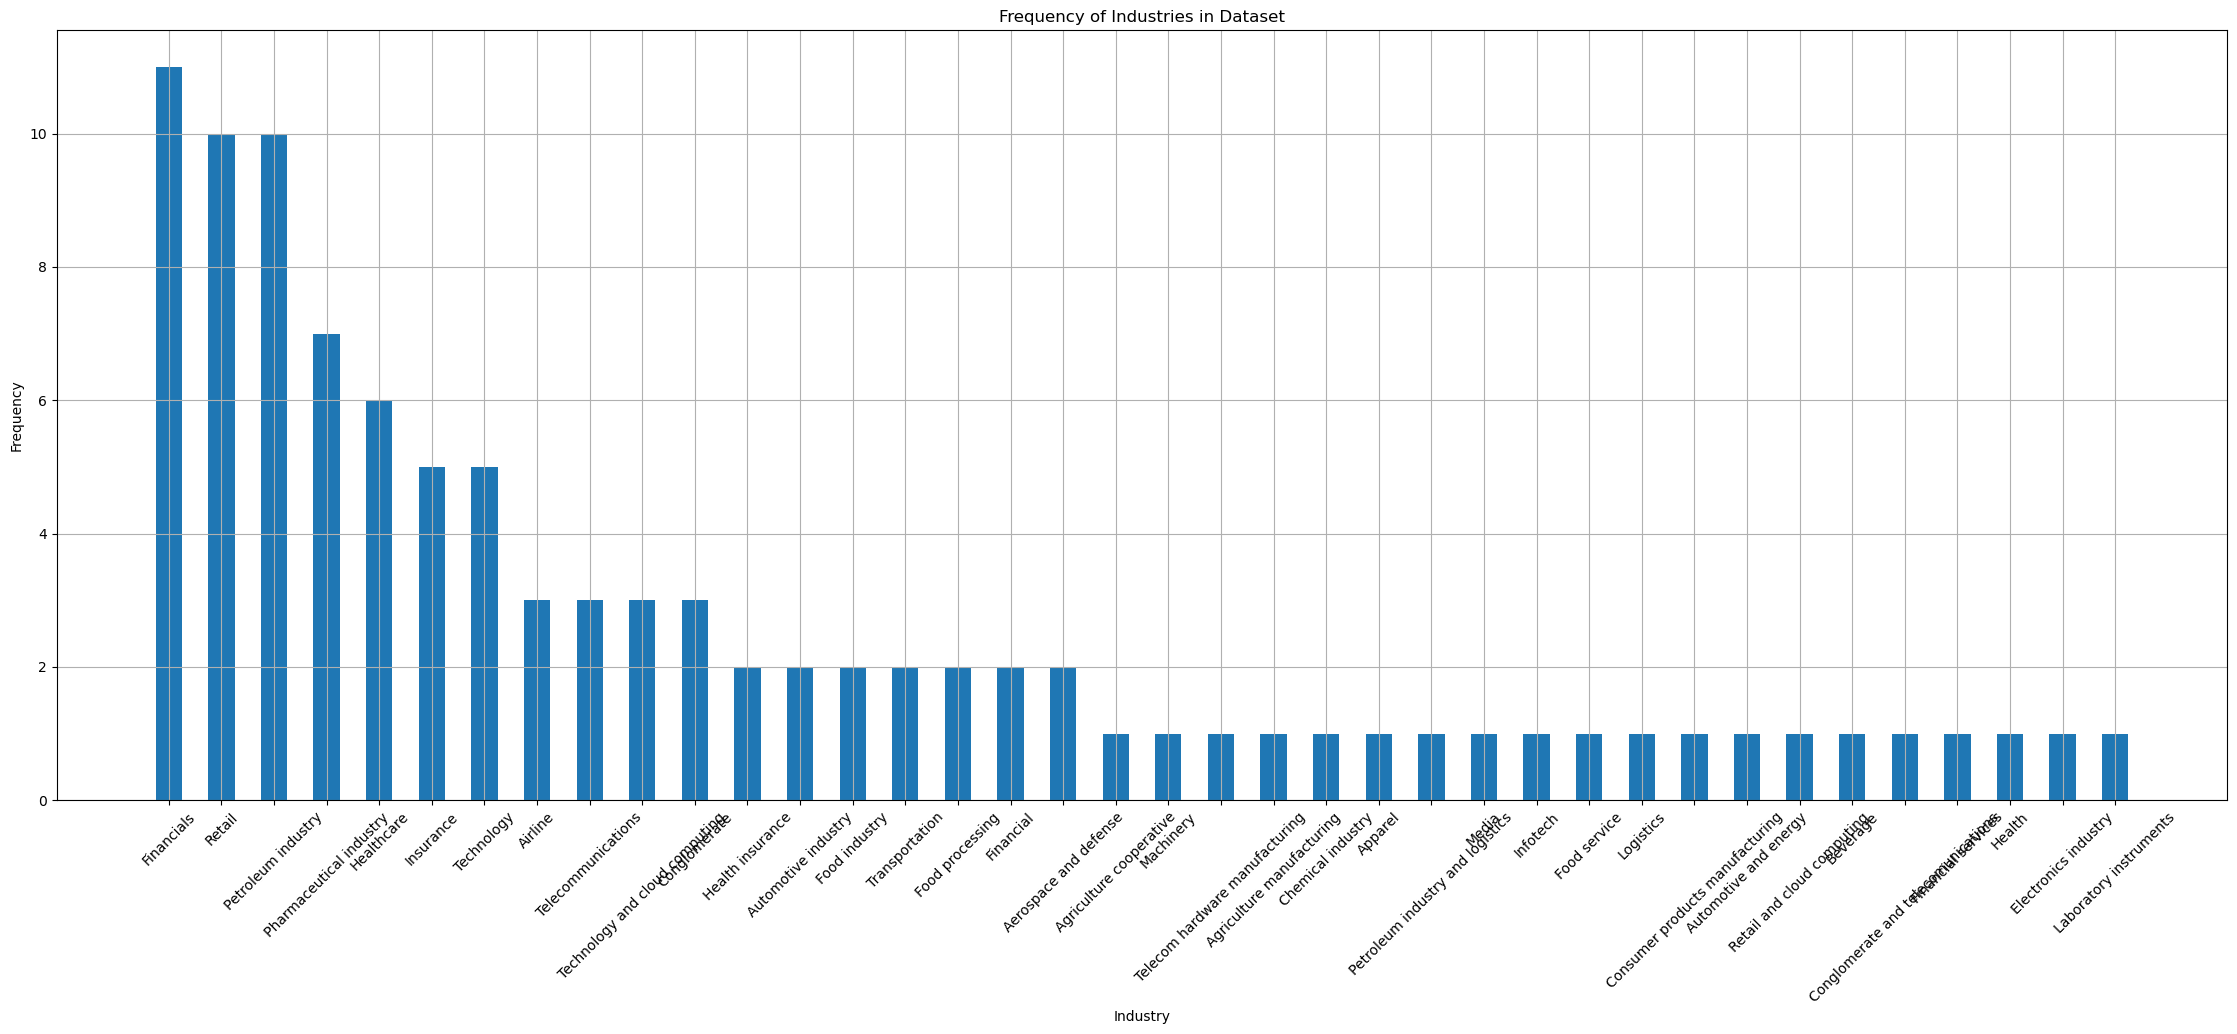

In [105]:
industries_number = data_df['Industry'].value_counts()

plt.figure(figsize=(28, 10)) 
plt.bar(industries_number.index, industries_number.values , width=0.5)
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.title('Frequency of Industries in Dataset')
plt.xticks(rotation=45)  
plt.grid(True) 
plt.show()

In [106]:
# finally we will save our data set into a csv file

data_df.to_csv("largest_companies_in_USA.csv",index = False)